Проект e-learning: вариант 2

Продакт-менеджер Василий попросил вас проанализировать завершенные уроки и ответить на следующие вопросы:

1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене) (7 баллов).

2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*. (5 баллов)

3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). (5 баллов) 

4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3). (8 баллов)

5. Напиши функцию на python, позволяющую строить когортный (семестровый) анализ. В период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов. Описание подхода можно найти тут.(10 баллов) 

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 0.1 до 0.5, monetary от 55 до 72 баллов. Описание подхода можно найти тут. (35 баллов)

*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

Файлы: 

    assessments.csv — этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).

code_module — идентификационный код предмета.

code_presentation — семестр (Идентификационный код).

id_assessment — тест (Идентификационный номер ассессмента).

assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

    courses.csv — файл содержит список предметов по семестрам.

code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код).

module_presentation_length — продолжительность семестра в днях.

    studentAssessment.csv — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.

id_assessment — тест (идентификационный номер).

id_student — идентификационный номер студента.

date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

    studentRegistration.csv — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.

code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код)

id_student — идентификационный номер студента.

date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import urllib
import json

Скачиваем файлы и сохраяем их как DataFrames для дальнейшего анализа

In [2]:
url1 = 'https://cloud-api.yandex.net/v1/disk/public/resources/download' + '?public_key=' + 'https://disk.yandex.ru/d/zrK7gMSHkKi5Aw'
r1 = requests.get(url1)
h1 = json.loads(r1.text)['href'] 
assessments = pd.read_csv(h1)

url2 = 'https://cloud-api.yandex.net/v1/disk/public/resources/download' + '?public_key=' + 'https://disk.yandex.ru/d/jl5jrvDRM39peQ'
r2 = requests.get(url2)
h2 = json.loads(r2.text)['href']
courses = pd.read_csv(h2)

url3 = 'https://cloud-api.yandex.net/v1/disk/public/resources/download' + '?public_key=' + 'https://disk.yandex.ru/d/VfirlOjD3UYDoA'
r3 = requests.get(url3)
h3 = json.loads(r3.text)['href']
studentAssessment = pd.read_csv(h3)

url4 = 'https://cloud-api.yandex.net/v1/disk/public/resources/download' + '?public_key=' + 'https://disk.yandex.ru/d/qmeUou7poVjmaw'
r4 = requests.get(url4)
h4 = json.loads(r4.text)['href']
studentRegistration = pd.read_csv(h4)

In [3]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [4]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [5]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [6]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


 Все таблицы считались корректно, можем идти дальше 
 \
 \
 \
 Построим распределения и посмотрим, есть ли что-то необычное в данных  
 \
 Сначала оценки:

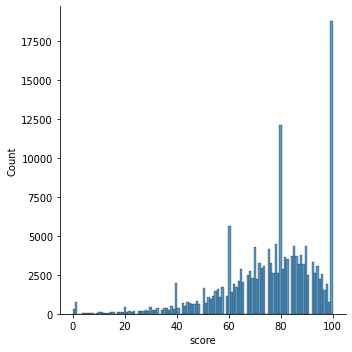

In [7]:
sns.displot(data = studentAssessment, x = 'score');

 По оценкам можно увидеть сильно большое число студентов с "круглыми" результатами (100, 80, 60, 40, 20). Это необычно, но можно объяснить возможной особенностью тестов. Пример: в тесте 5 вопросов, ответив правильно на все можно получить 100 баллов, а ответив правильно на 4 вопроса получить 80 баллов и т.д. то есть в таких тестах не будет промежуточных значений  
 \
 Теперь посмотрим на время сдачи тестов студентами:

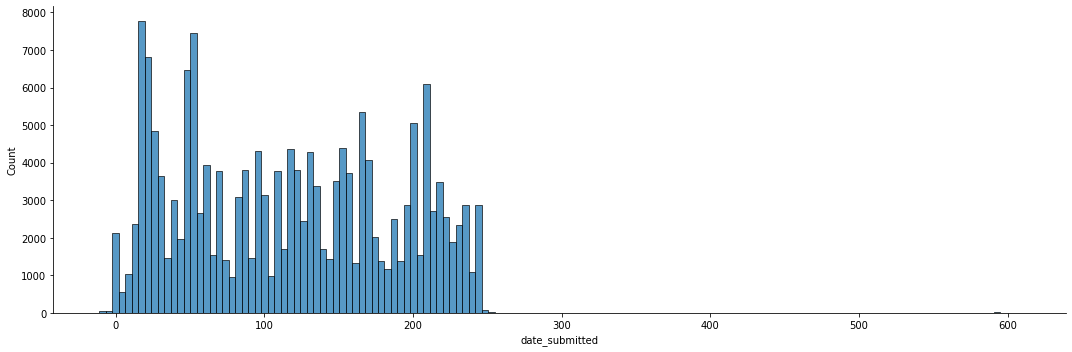

In [8]:
sns.displot(data = studentAssessment, x = 'date_submitted',height = 5 , aspect = 3);

 По времени сдачи тестов есть явные выбросы в районе 600. Т.е. некоторые студенты сдают задания почти через 2 года с начала семестра.
 
 
 Может есть предмет с поздним сроком сдачи? Посмотрим распределение сроков сдачи тестов, указанных в программе:

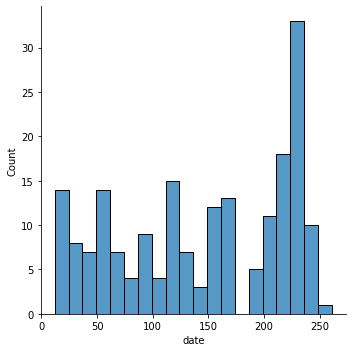

In [9]:
sns.displot(data = assessments, x = 'date', bins = 20);

In [10]:
assessments.date.max()

261.0

 По программе тесты надо сдать в пределах 261 дня, но в реальности у нас имеются студенты сдающие сильно позже, а некоторые и раньше. Сколько тех и других?
 
 
 Сначала проверяем данные на дубликаты, вдруг есть те, кто пересдавал предмет, а затем уже смотрим на должников и сдающих заранее

In [11]:
studentAssessment.duplicated(['id_assessment', 'id_student']).sum()

0

In [12]:
studentAssessment[studentAssessment['date_submitted'] > 261]

,id_assessment,id_student,date_submitted,is_banked,score
43498,15022,1723749,270,0,NaN
53661,24290,555008,266,0,56.0
65108,24299,555498,285,0,58.0
95346,25368,2341830,279,0,49.0
103370,30722,691701,274,0,NaN
...,...,...,...,...,...
139321,34893,628846,487,0,63.0
139367,34893,631075,395,0,65.0
140157,34894,628476,591,0,78.0
149787,34904,653846,298,0,87.0


Получилось, что у нас 74 должника.

In [13]:
studentAssessment[studentAssessment['date_submitted'] < 0]

,id_assessment,id_student,date_submitted,is_banked,score
1641,1758,603861,-1,1,61.0
1685,1758,1970390,-1,1,78.0
1690,1758,2073016,-1,1,60.0
1693,1758,2139353,-1,1,65.0
1708,1758,2358969,-1,1,68.0
...,...,...,...,...,...
172516,37440,624767,-1,1,100.0
172526,37440,631446,-1,1,100.0
172717,37441,624767,-1,1,100.0
172727,37441,631446,-1,1,100.0


In [14]:
studentAssessment[studentAssessment['date_submitted'] < 0]['date_submitted'].value_counts()

-1     1927
-8       37
-3       30
-2       25
-5       13
-4       12
-6        6
-7        4
-11       1
-9        1
-10       1
Name: date_submitted, dtype: int64

In [15]:
studentAssessment[studentAssessment['date_submitted'] < 0]['is_banked'].sum()

1909

 Сдающих заранее 2057. При чем большинство сдающих заранее (1909 человек) - это студенты с перезачетами дисциплин. 
 
 
 Еще посмотрим распределения студентов по датам регистрации и отписки от курсов:

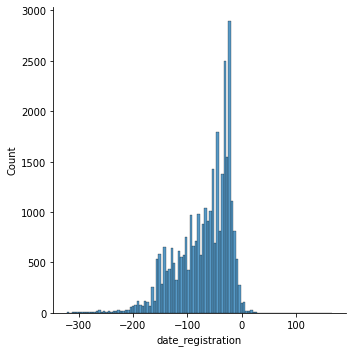

In [16]:
sns.displot(data = studentRegistration, x = 'date_registration');

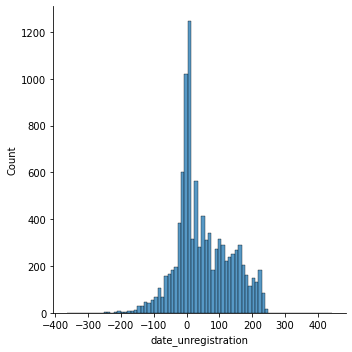

In [17]:
sns.displot(data = studentRegistration, x = 'date_unregistration');

Записываются на курс всегда заранее, а отписываются в основном в процессе прохождения. Ничего необычного в этих распределениях на первый взгляд нет

## 1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене)

Для решения этого и последующих заданий надо определить, что такое курс и зачет по курсу на экзамене  


Курс - предмет с экзаменом
\
Зачет по курсу на экзамене - это оценка больше или равно 40 баллов на экзамене

Примечание: за курс был взят предмет с экзаменом, поскольку другой информации об успешной сдаче курса (завершенность курса), которая равняется успешно сданному экзамену, дано не было, т.е. непонятно как расчитавается оценка за курс без учета экзамена

Чтобы узнать количество студентов с успешной сдачей одного курса надо:
- объединить таблицы с оценками (assessments) с оценками студентов (studentAssessment)
- выбрать тип теста 'Exam' и оценку >= 40
- сгруппировать по студентам, посчитать кол-во курсов и отобрать только тех студентов, у которых был только один курс

In [18]:
m_assessments = assessments.merge(right = studentAssessment, how = 'inner', on = 'id_assessment')

In [19]:
m_assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0


In [20]:
n1 = m_assessments.query('assessment_type == "Exam" & score >= 40') \
    .groupby(['id_student'], as_index = False) \
    .agg({'code_module':'count'}) \
    .query('code_module == 1') \
    .shape[0]
print('Сколько студентов успешно сдали только один курс? Ответ:',n1)

Сколько студентов успешно сдали только один курс? Ответ: 3802


## 2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*.

*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

Для решения этого задания будем использовать предыдущий объединенный датафрейм m_assessments
\
1) Создаем exams_df с общим кол-вом попыток сдать экзамен
\
1.1) Указываем в запросе тип теста = 'Exam'
\
1.2) Группируем по коду предмета и id теста
\
1.3) Считаем количество попыток сдать экзамен, через количество студентов, переименовываем колонку в 'all_exams'
\
2) Добавляем колонку с кол-вом успешных экзаменов, используя сортировку ('score >=40')
\
3) Добавляем колонку с завершаемостью экзаменов ('completion_exam')
\
4) Находим максимальное и минимальное значение по колонке 'completion_exam'
\
Максимум будет означать более высокую завершаемость, т.е. более простой экзамен
\
Минимум - более низкая завершаемость, т.е. более сложный экзамен

In [21]:
exams_df = m_assessments.query('assessment_type == "Exam"') \
    .groupby(['code_module', 'id_assessment'], as_index = False) \
    .agg({'id_student':'count'}).rename(columns = {'id_student':'all_exams'})

In [22]:
exams_df['pass_exams'] = m_assessments.query('assessment_type == "Exam" & score >=40') \
    .groupby(['code_module', 'id_assessment'], as_index = False) \
    .agg({'id_student':'count'})['id_student']

In [23]:
exams_df['completion_exam'] = exams_df['pass_exams'] / exams_df['all_exams']

In [24]:
exams_df.head()

,code_module,id_assessment,all_exams,pass_exams,completion_exam
0,CCC,24290,747,664,0.888889
1,CCC,24299,1168,1019,0.872432
2,DDD,25340,602,504,0.837209
3,DDD,25354,968,878,0.907025
4,DDD,25361,524,485,0.925573


Экзамен с самой высокой завершаемостью:

In [25]:
exams_df[exams_df['completion_exam'] == exams_df.completion_exam.max()]

,code_module,id_assessment,all_exams,pass_exams,completion_exam
4,DDD,25361,524,485,0.925573


Экзамен с самой низкой завершаемостью:

In [26]:
exams_df[exams_df['completion_exam'] == exams_df.completion_exam.min()]

,code_module,id_assessment,all_exams,pass_exams,completion_exam
2,DDD,25340,602,504,0.837209


 Можно еще посмотреть на завершаемость самих предметов
 \
Для этого создаем еще один df сгруппированный по предмету
\
Также создаем колонку 'completion_module'
\
По колонке 'completion_module' находим самый простой предмет и самый сложный

In [27]:
exams2 = exams_df.groupby(['code_module'], as_index=False).agg({'all_exams':'sum', 'pass_exams':'sum'})

In [28]:
exams2['completion_module'] = exams2.pass_exams / exams2.all_exams

In [29]:
exams2 

,code_module,all_exams,pass_exams,completion_module
0,CCC,1915,1683,0.878851
1,DDD,3044,2709,0.889947


 По значениям 'completion_module' можно понять, что предметы между собой по сложности сдачи экзаменов почти не различаются
 \
 \
 Можно отметить, что CCC более сложный (завершаемость 0.88) по сравнению с DDD (завершаемость 0.89) 
 
 
 ### Ответ:
- Cамый сложный экзамен 25340 (code_module = 'DDD', id_assessment = 25340) c завершаемостью 0.84
- Самый простой экзамен 25361 (code_module = 'DDD', id_assessment = 25361) с завершаемостью 0.93

## 3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). 

Чтобы узнать средний срок сдачи, для начала построим реапределение сдачи экзаменов. По всем предметам и по каждому в отдельности

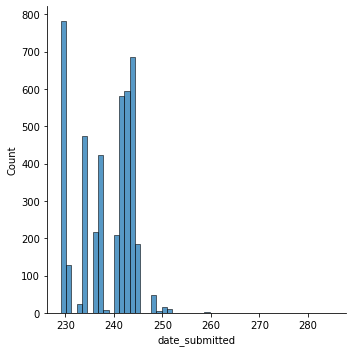

In [30]:
sns.displot(data = m_assessments.query('assessment_type == "Exam" & score >= 40'), x = 'date_submitted');

In [31]:
m_assessments.query('assessment_type == "Exam" & score >= 40 & date_submitted > 250').shape[0]

17

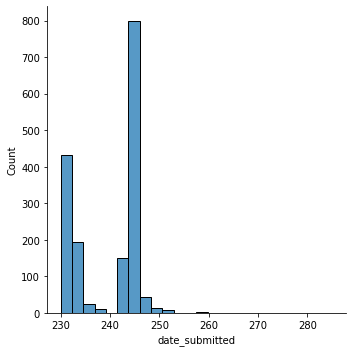

In [32]:
sns.displot(data = m_assessments.query('assessment_type == "Exam" & score >= 40 & code_module == "CCC"'), x = 'date_submitted');

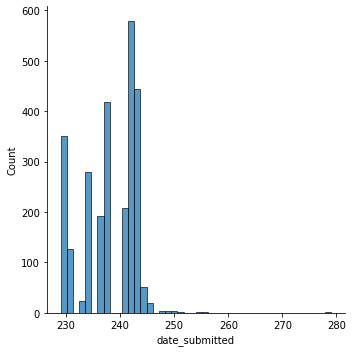

In [33]:
sns.displot(data = m_assessments.query('assessment_type == "Exam" & score >= 40 & code_module == "DDD"'), x = 'date_submitted');

In [34]:
m_assessments.query('assessment_type == "Exam" & score >= 40') \
    .groupby(['code_module'], as_index = False) \
    .agg({'date_submitted':'mean'})

,code_module,date_submitted
0,CCC,239.345217
1,DDD,237.976006


In [35]:
m_assessments.query('assessment_type == "Exam" & score >= 40') \
    .groupby(['code_module'], as_index = False) \
    .agg({'date_submitted':'median'})

,code_module,date_submitted
0,CCC,244
1,DDD,237


 Исходя из распределений (асимметричные с выбросами) в качестве ответа будем брать медианное значение
 \
 \
 ### Ответ:
 - Средний срок сдачи экзаменов по CCC 244 от начала семестра
 - Средний срок сдачи экзаменов по DDD 237 от начала семестра

## 4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3). 

 Ответ:

Топ 3 самых популярных предметов:

In [36]:
studentRegistration.groupby(['code_module'], as_index = False)\
    .agg({'id_student':'count'}) \
    .sort_values(['id_student'], ascending = False) \
    .rename(columns = {'id_student':'count_reg'}) \
    .head(3)

,code_module,count_reg
1,BBB,7909
5,FFF,7762
3,DDD,6272


Топ 3 предметов с самым большим оттоком:

In [37]:
studentRegistration.groupby(['code_module'], as_index = False)\
    .agg({'date_unregistration':'count'})\
    .sort_values(['date_unregistration'], ascending = False)\
    .rename(columns = {'date_unregistration':'count_unreg'})\
    .head(3)

,code_module,count_unreg
5,FFF,2380
1,BBB,2377
3,DDD,2235


## 5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов. 

Так же как и раньше расчитываем завершаемость по семестрам и смотрим на медианное значение времени сдачи курсов 

In [38]:
semester_df = m_assessments.query('assessment_type == "Exam"')\
    .groupby(['code_presentation'], as_index = False)\
    .agg({'date_submitted':'median', 'id_student':'count'})\
    .rename(columns = {'id_student':'all_exams', 'date_submitted':'median_date_sub'})

In [39]:
semester_df['pass_exams'] = m_assessments.query('assessment_type == "Exam" & score >=40') \
    .groupby(['code_presentation'], as_index = False) \
    .agg({'id_student':'count'})['id_student']

In [40]:
semester_df['completion'] = semester_df['pass_exams'] / semester_df['all_exams']

In [41]:
semester_df

,code_presentation,median_date_sub,all_exams,pass_exams,completion
0,2013B,230,602,504,0.837209
1,2013J,241,968,878,0.907025
2,2014B,234,1271,1149,0.904013
3,2014J,244,2118,1861,0.878659


In [42]:
semester_df.query('median_date_sub == median_date_sub.max() & completion == completion.min()')

,code_presentation,median_date_sub,all_exams,pass_exams,completion


 Ответ:
 \
 У нас нет семестра с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов
 \
 Но есть семестр с самой низкой завершаемостью курсов и семестр самыми долгими средними сроками сдачи курсов:

In [43]:
semester_df.query('median_date_sub == median_date_sub.max() | completion == completion.min()')

,code_presentation,median_date_sub,all_exams,pass_exams,completion
0,2013B,230,602,504,0.837209
3,2014J,244,2118,1861,0.878659


## 6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. 

 Для кластеризации были выбраны метрики:
 \
 R - среднее время сдачи одного экзамена,
 \
 F - завершаемость курсов,
 \
 M - среднее количество баллов

In [44]:
rfm_df = m_assessments.query('assessment_type == "Exam"')\
    .groupby(['id_student'], as_index = False)\
    .agg({'date_submitted':'median', 'score':'mean'})\
    .rename(columns = {'date_submitted':'Recency', 'score':'Monetary'})

rfm_df

,id_student,Recency,Monetary
0,23698,243.0,80.0
1,24213,236.0,58.0
2,27116,243.0,96.0
3,28046,237.0,40.0
4,28787,243.0,44.0
...,...,...,...
4628,2694886,236.0,69.0
4629,2694933,230.0,73.0
4630,2695608,237.0,73.0
4631,2697181,230.0,80.0


F = завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [45]:
f_df = m_assessments.query('assessment_type == "Exam"')\
    .groupby(['id_student'], as_index = False)\
    .agg({'code_module':'count', 'score':lambda x: sum(y >= 40 for y in x)})

In [46]:
rfm_df.insert(2, 'Frequency', f_df['score'] / f_df['code_module'])

In [47]:
rfm_df

,id_student,Recency,Frequency,Monetary
0,23698,243.0,1.0,80.0
1,24213,236.0,1.0,58.0
2,27116,243.0,1.0,96.0
3,28046,237.0,1.0,40.0
4,28787,243.0,1.0,44.0
...,...,...,...,...
4628,2694886,236.0,1.0,69.0
4629,2694933,230.0,1.0,73.0
4630,2695608,237.0,1.0,73.0
4631,2697181,230.0,1.0,80.0


 Для расчета границ метрик R и M взяты квантили.
 \
 Для R - чем больше значение, тем меньше оценка
 \
 Для M - чем больше значение, тем больше оценка
 \
 Метрика F разбита по значениям:    
 - 0 - 1    
 - 0.5 - 2    
 - 1 - 3

То есть студенты сдающие тесты раньше (Recency), завершающие тесты (Frequency), имеющие высокий балл (Monetary),будут иметь r=3, f=3, m=3

In [48]:
quant_rm = rfm_df[['Recency', 'Monetary']].quantile([.25, .75]).to_dict()

In [49]:
quant_rm

{'Recency': {0.25: 234.0, 0.75: 243.0}, 'Monetary': {0.25: 50.0, 0.75: 82.0}}

In [50]:
def r_scores(x):
    if x <= quant_rm['Recency'][.25]:
        return 3
    elif x <= quant_rm['Recency'][.75]:
        return 2
    else:
        return 1

def f_scores(x):
    if x == 1:
        return 3
    elif x == 0.5:
        return 2
    else:
        return 1


def m_scores(x):
    if x <= quant_rm['Monetary'][.25]:
        return 1
    elif x <= quant_rm['Monetary'][.75]:
        return 2
    else:
        return 3

In [51]:
rfm_df['r'] = rfm_df['Recency'].apply(lambda x: r_scores(x))
rfm_df['f'] = rfm_df['Frequency'].apply(lambda x: f_scores(x))
rfm_df['m'] = rfm_df['Monetary'].apply(lambda x: m_scores(x))

In [52]:
rfm_df

,id_student,Recency,Frequency,Monetary,r,f,m
0,23698,243.0,1.0,80.0,2,3,2
1,24213,236.0,1.0,58.0,2,3,2
2,27116,243.0,1.0,96.0,2,3,3
3,28046,237.0,1.0,40.0,2,3,1
4,28787,243.0,1.0,44.0,2,3,1
...,...,...,...,...,...,...,...
4628,2694886,236.0,1.0,69.0,2,3,2
4629,2694933,230.0,1.0,73.0,3,3,2
4630,2695608,237.0,1.0,73.0,2,3,2
4631,2697181,230.0,1.0,80.0,3,3,2


 Разделим на кластеры наших студентов. У нас есть две зависимые друг от друга переменные: m (баллы) и f (завершаемость), если их зафиксировать, то будет легче разбить студентов на группы, поскольку одно исключает другое
 \
 Пример: у студента не может быть низкая и средняя завершаемость (f=1, f=2) при высоких средних баллах (m=3)
 \
 \
 Группы:  
- best - x33 - отличники, которые имеют высокую завершаемость курсов и высокий средний балл,    
- good - x32 - хорошисты, которые имеют высокую завершаемость и средний средний балл,   
- need_attention - x22 - студенты, которые имеют среднюю завершаемость и средний средний балл, им стоит больше времени уделять учебе,   
- udos - x31 - студенты, которые имеют высокую завершаемость и низкий средний балл, те, кто работает исключительно на минимальный проходной балл,    
- almost_lost - x21 - студенты, которые имеют среднюю завершаемость и низкий средний балл, близки к отчислению из-за баллов,
- lost - x11 - студенты, которые имеют низкую завершаемость и низкий средний балл, кандидаты на отчисление
\
\
Первое число - (х) - r (среднее время сдачи), второе - f (завершаемость), третье - m (средний балл)    
\
Создадим словарь с кластерами, затем колонку 'segment' со значениями из колонок 'f' и 'm' и заменим цифровые значения на названия кластеров из нашего словаря

In [53]:
segm_map = {
    '[3][3]':'best',
    '[3][2]':'good',
    '[2][2]':'need_attention',
    '[3][1]':'udos',
    '[2][1]':'almost_lost',
    '[1][1]':'lost'
}

In [54]:
rfm_df['segment'] = rfm_df['f'].map(str) + rfm_df['m'].map(str)

In [55]:
rfm_df['segment'] = rfm_df['segment'].replace(segm_map, regex = True)

In [56]:
rfm_df

,id_student,Recency,Frequency,Monetary,r,f,m,segment
0,23698,243.0,1.0,80.0,2,3,2,good
1,24213,236.0,1.0,58.0,2,3,2,good
2,27116,243.0,1.0,96.0,2,3,3,best
3,28046,237.0,1.0,40.0,2,3,1,udos
4,28787,243.0,1.0,44.0,2,3,1,udos
...,...,...,...,...,...,...,...,...
4628,2694886,236.0,1.0,69.0,2,3,2,good
4629,2694933,230.0,1.0,73.0,3,3,2,good
4630,2695608,237.0,1.0,73.0,2,3,2,good
4631,2697181,230.0,1.0,80.0,3,3,2,good


 Мы получили 

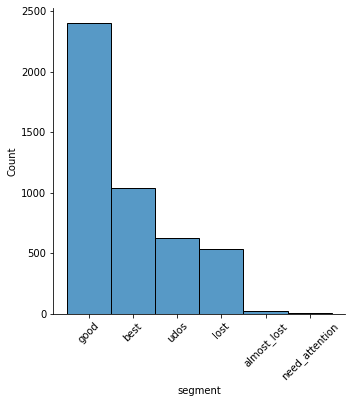

In [57]:
sns.displot(data = rfm_df, x = 'segment')
plt.xticks(rotation = 45)
plt.show()

In [58]:
rfm_df.query('m==2 & f==3').m.value_counts()

2    2405
Name: m, dtype: int64